#Diabetes Data Processing And visualisation

*This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.*

**Question :- Can feature swhich accurately predict whether or not the patients in the dataset have diabetes or not?**

#conclusion:-
**The most important feature are to conclude whether a patient is diabetes or not? according to decreasing their Co-relationship between final output**

1)Glucose

2)BMI

3)Age

4)pregnancies

5)SkinThickness

6)Insulin 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
Data=pd.read_csv("diabetes.csv");
display(Data.head());

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
Data.info(verbose=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see all data is integers and Float Data types

In [0]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [0]:
Data_copy = Data.copy(deep = True)
print(Data_copy.isnull().sum())
#replace zero with Nan so that we can replace it with its mean
Data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(Data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


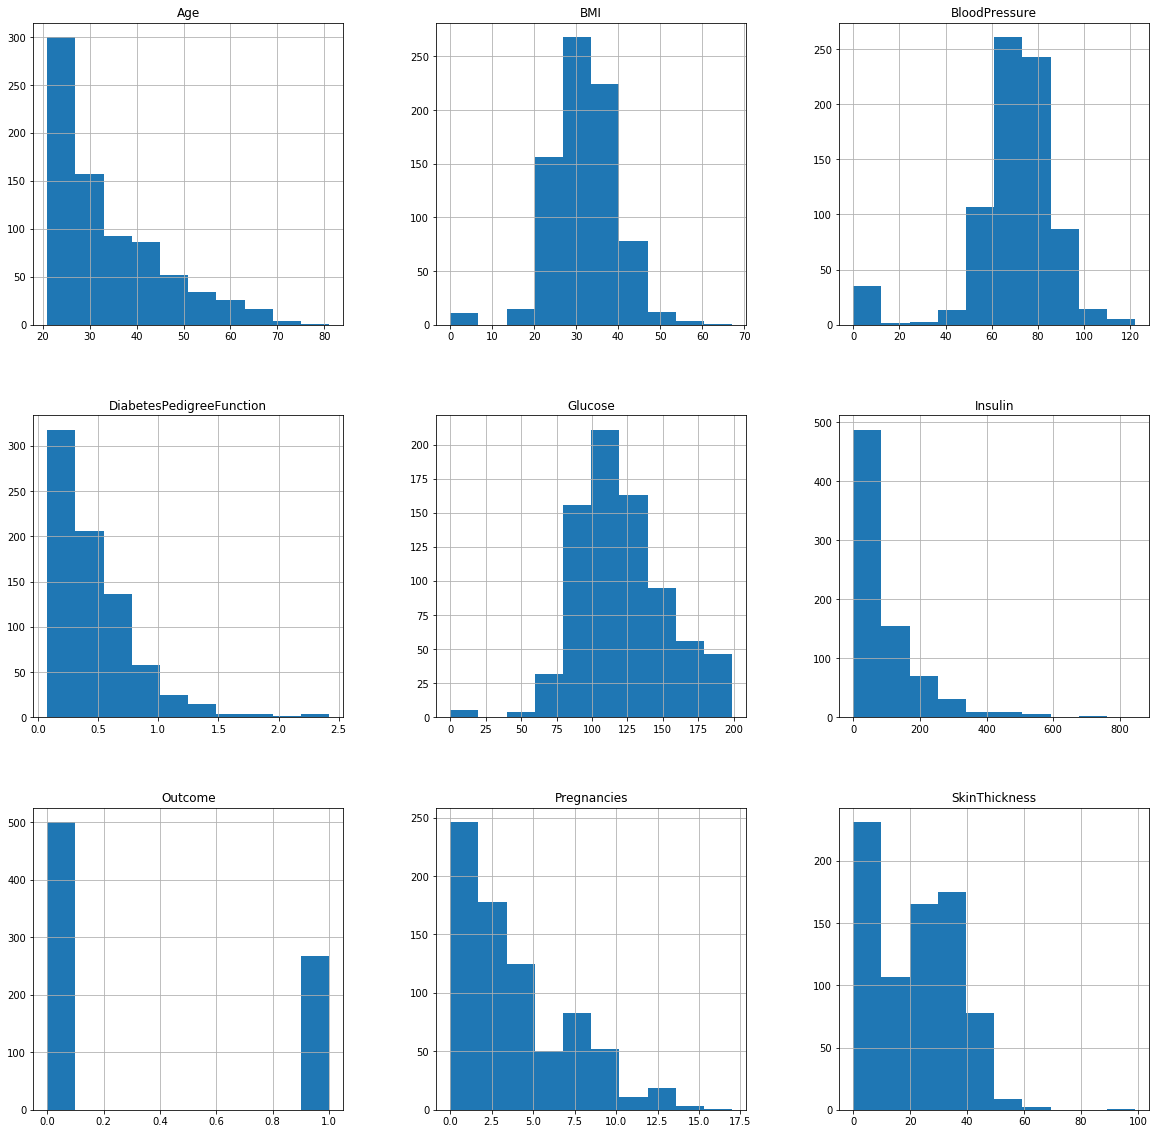

In [0]:
p = Data.hist(figsize = (20,20))

We can see Data distribution of Data frame before we  have "0"  values 

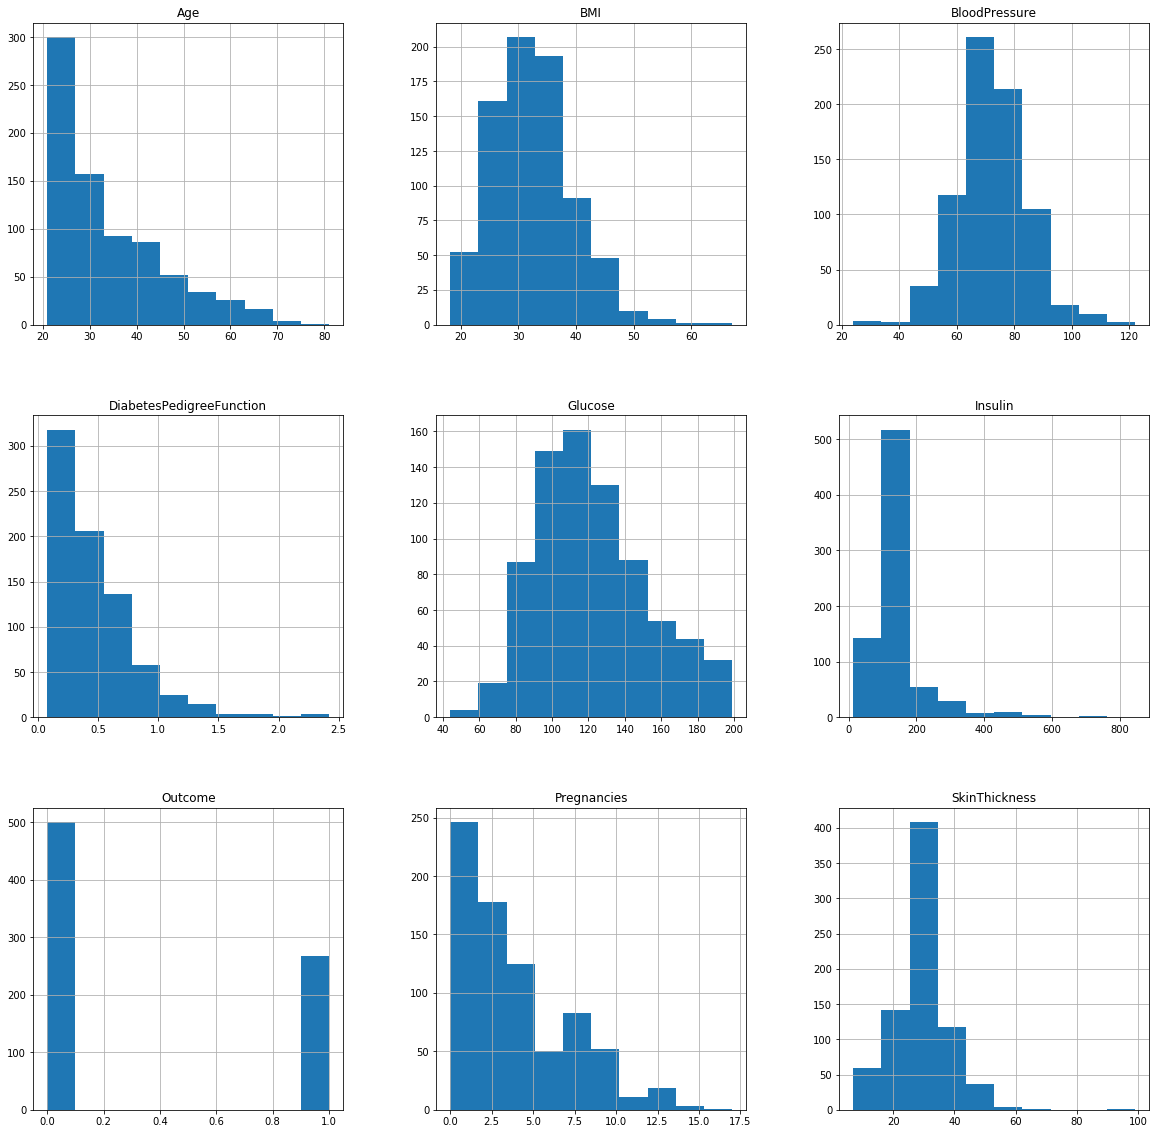

In [0]:
Data_copy['Glucose'].fillna(Data_copy['Glucose'].mean(), inplace = True)
Data_copy['BloodPressure'].fillna(Data_copy['BloodPressure'].mean(), inplace = True)
Data_copy['SkinThickness'].fillna(Data_copy['SkinThickness'].median(), inplace = True)
Data_copy['Insulin'].fillna(Data_copy['Insulin'].median(), inplace = True)
Data_copy['BMI'].fillna(Data_copy['BMI'].median(), inplace = True)
p = Data_copy.hist(figsize = (20,20))


We can see Data distribution of Data frame before we doesnot have "0" values instead replaced it by its mean values

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


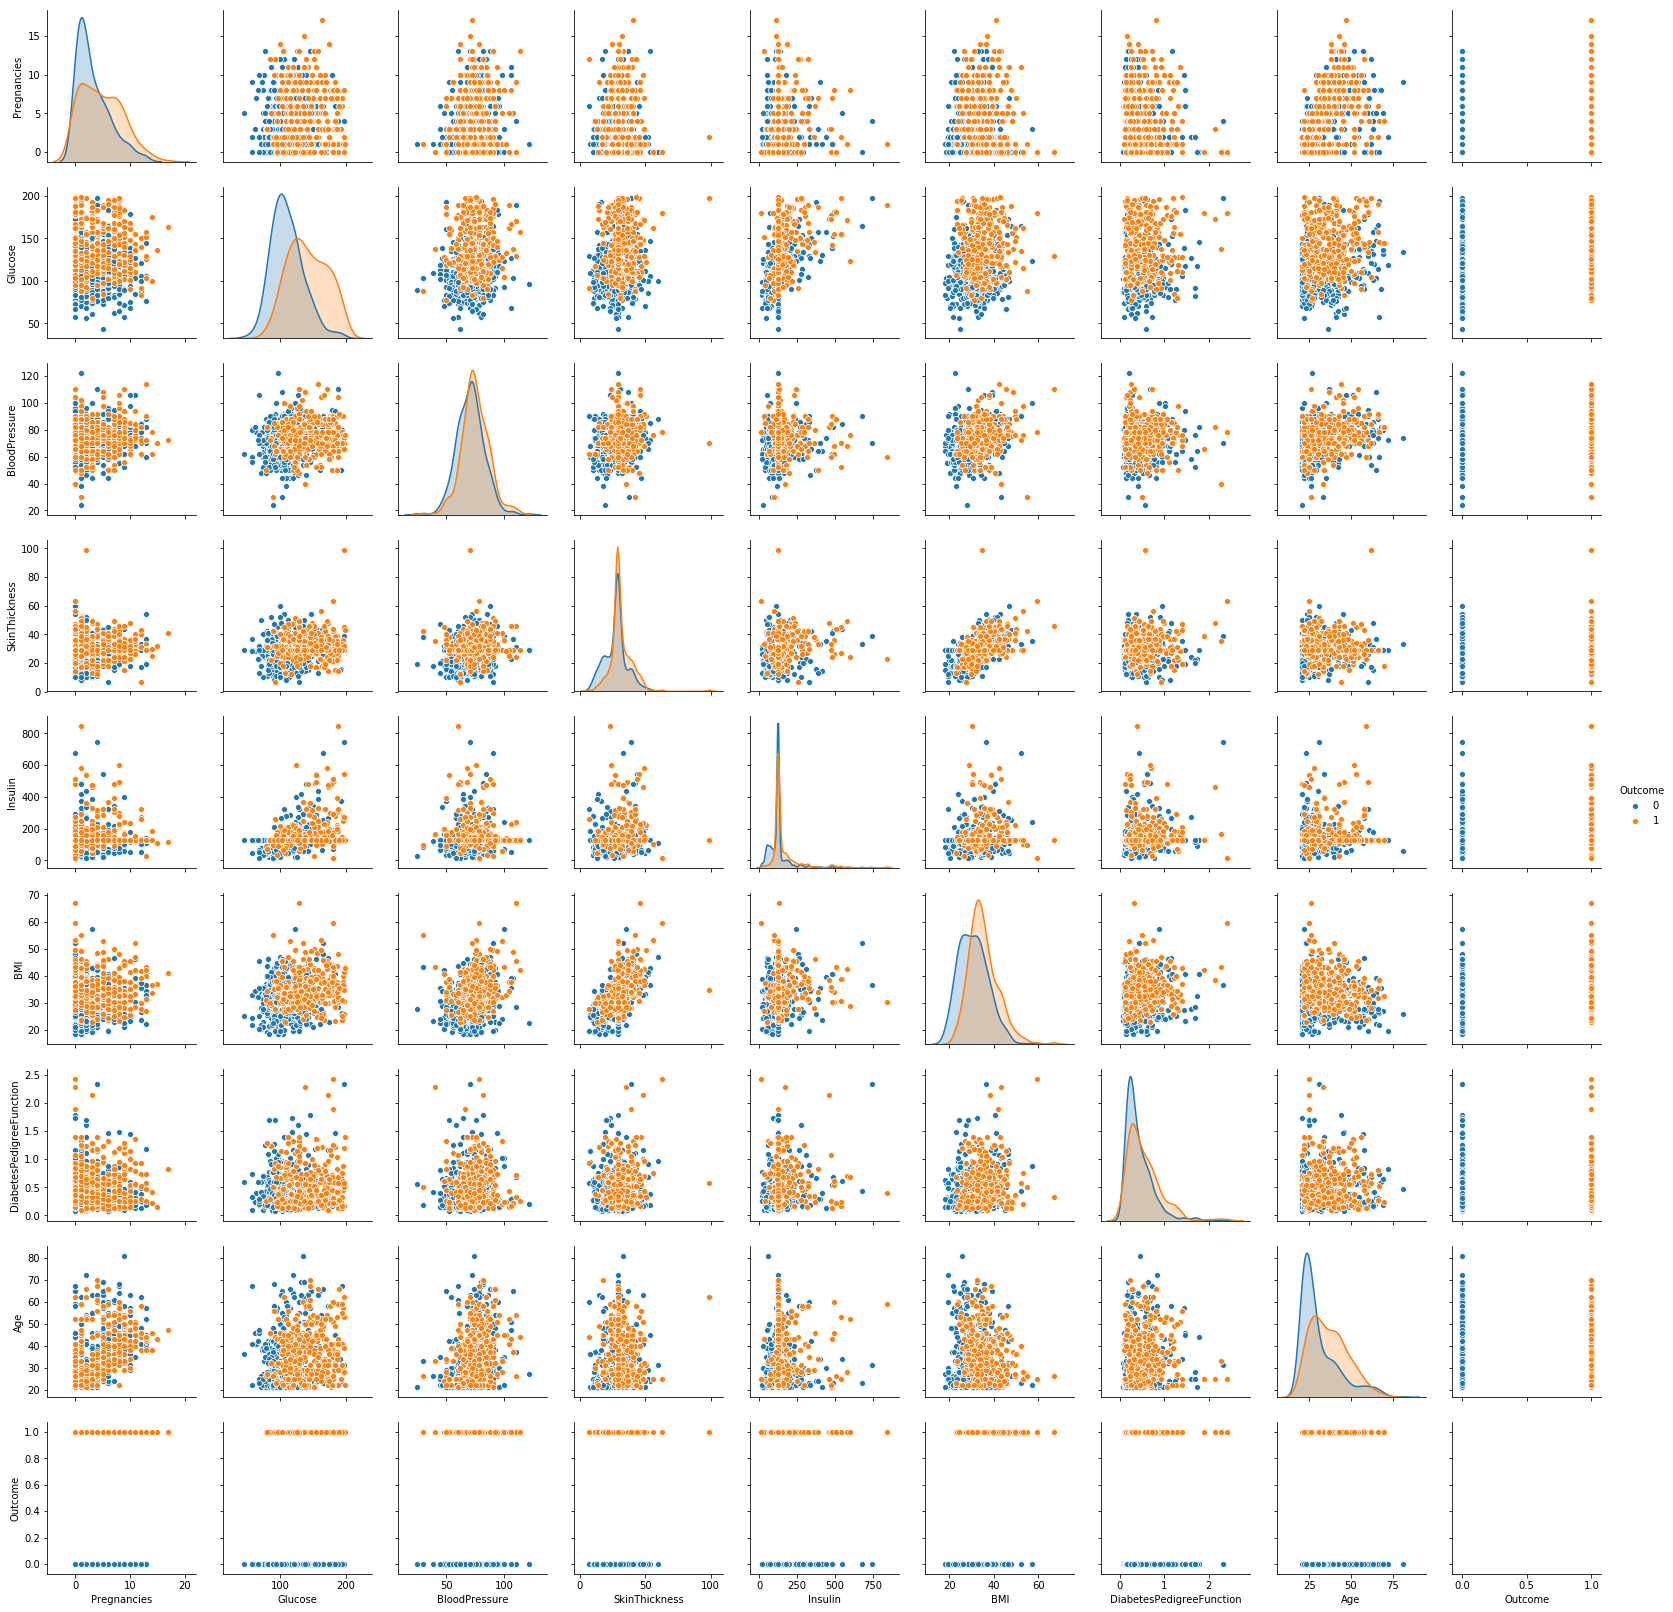

In [0]:
p=sns.pairplot(Data_copy, hue = 'Outcome')

Let use see the relation of data Spread along with respect to another features and we can see the realtion ship between features

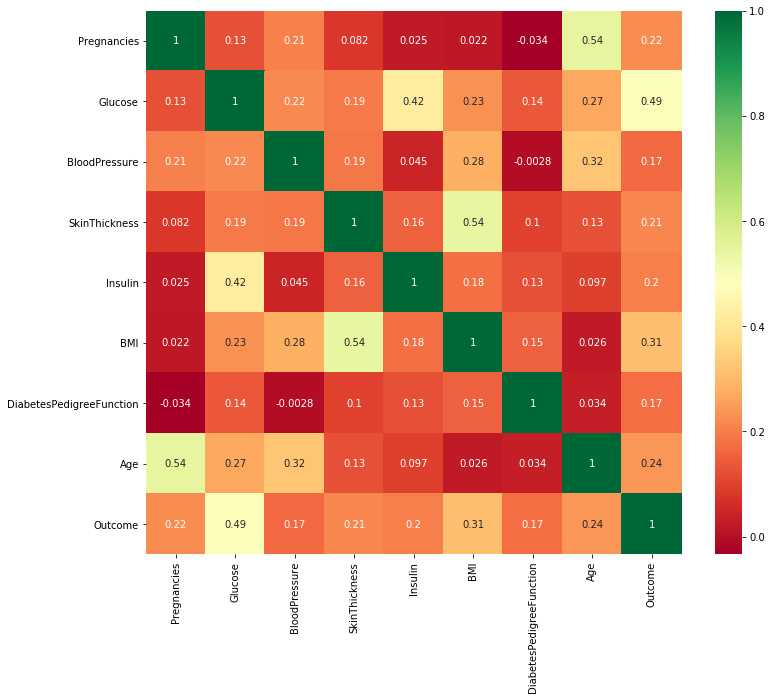

In [0]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(Data_copy.corr(), annot=True,cmap ='RdYlGn')

Let us see correlation of each with respect to other by covariance matrix and heatmap

In [0]:
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
x_data = ['Pregnancies', 'Glucose',
          'SkinThickness', 'Insulin',
          'BMI', 'Age',]

y_data = [Data_copy['Pregnancies'],Data_copy['Glucose'],Data_copy['SkinThickness'],Data_copy['Insulin'],Data_copy['BMI'],Data_copy['Age']]
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']

traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Factor effect on Diabetes',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
plotly.offline.plot(fig)

'file:///content/temp-plot.html'

#Created plotly interactive Box plot